In [30]:
import pickle
import os
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
import time
import keras
from keras import utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np

(2839, 4732, 3) (360, 360, 3)


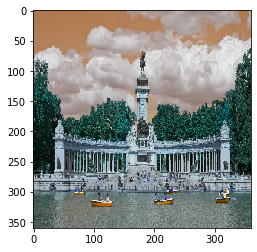

In [31]:
path = '../Local-Final-project/Dataset/alfonso_xii/alfonsoXII_1.jpg'
im = cv2.imread(path)
imres = cv2.resize(im,(360,360))
print(im.shape, imres.shape)
plt.figure()
plt.imshow(imres)

In [32]:
def resizeDataset(path):
    resizedim = []
    for pc in glob.glob(f"../Local-Final-project/{path}/*/*"):
        resizedim.append(cv2.resize(cv2.imread(pc), (128,128)))
    return np.asarray(resizedim)

In [33]:
for pc in glob.glob("../Local-Final-project/Dataset/*/*"):
    print(pc)
    break


../Local-Final-project/Dataset/ayuntamiento/ayuntamiento5.jpg


In [34]:
import os

path, dirs, files = next(os.walk("../Local-Final-project/Dataset"))
dirs_count = len(dirs)
dirs_count

13

In [35]:
def groundTruth(folder):
    path, dirs, files = next(os.walk(f"../Local-Final-project/{folder}"))
    GT=[]
    for pc in glob.glob(f"../Local-Final-project/{folder}/*/*"):
        for i in range(0,len(dirs)):
            if pc.split('/')[-2] == dirs[i]:
                #print(pc.split('/')[-2], i)
                GT.append(i)
    return np.asarray(GT)

In [36]:
y = groundTruth('Dataset')

In [37]:
X = resizeDataset('Dataset')

In [38]:
print(X.shape, y.shape)

(1073, 128, 128, 3) (1073,)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(858, 128, 128, 3) (215, 128, 128, 3) (858, 13) (215, 13)


In [41]:
filepath='Checkpoint_{epoch:02d}_{val_accuracy:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]



In [44]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [45]:
batch_size = 15
epochs = 25

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=callbacks_list)

Train on 858 samples, validate on 215 samples
Epoch 1/25
858/858 [==============================] - 67s 78ms/step - loss: 177.3980 - accuracy: 0.0769 - val_loss: 2.5351 - val_accuracy: 0.0651

Epoch 00001: val_accuracy did not improve from 0.12093
Epoch 2/25
858/858 [==============================] - 66s 77ms/step - loss: 2.6968 - accuracy: 0.1049 - val_loss: 3.6408 - val_accuracy: 0.1814

Epoch 00002: val_accuracy improved from 0.12093 to 0.18140, saving model to Checkpoint_02_0.18.hdf5
Epoch 3/25
858/858 [==============================] - 66s 77ms/step - loss: 2.6031 - accuracy: 0.1177 - val_loss: 2.3728 - val_accuracy: 0.1535

Epoch 00003: val_accuracy did not improve from 0.18140
Epoch 4/25
858/858 [==============================] - 67s 78ms/step - loss: 2.7315 - accuracy: 0.1667 - val_loss: 2.0122 - val_accuracy: 0.2744

Epoch 00004: val_accuracy improved from 0.18140 to 0.27442, saving model to Checkpoint_04_0.27.hdf5
Epoch 5/25
858/858 [==============================] - 68s 79ms

In [ ]:
moment=time.localtime()
name='Model_{}_{}-{}-{}.h5'.format(model.history.history["val_accuracy"][-1],moment[2],moment[3],moment[4])
model.save(name)

In [ ]:
import json

model_json = model.to_json()
with open(name+'.json', "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights(name)